# Assignment 9 - Web Dev

💡 Question-1: What are hooks in react? how to identify hooks?

 Solution-1:

In React, hooks are functions that allows to use state, lifecycle methods, and other React features in functional components. They provide a way to write reusable logic and manage component state without writing class components.

To identify hooks, there are two main rules:

Hook functions start with the prefix "use-": React hook functions are conventionally named with a "use" prefix. For example, useState, useEffect, useContext, etc.

Hooks can only be used at the top level: Hooks can only be called at the top level of a functional component or within other custom hooks. They cannot be called within loops, conditions, or nested functions.

Here are some commonly used hooks in React:

useState: Allows functional components to manage state by providing a state variable and a function to update that state variable.

useEffect: Performs side effects in functional components, such as data fetching, subscriptions, or modifying the DOM. It replaces lifecycle methods like componentDidMount, componentDidUpdate, and componentWillUnmount.

useContext: Enables functional components to access values from a React context created with React.createContext.

useRef: Provides a way to create a mutable variable that persists across component renders. It can be used to access or modify DOM elements.

useReducer: A more powerful alternative to useState for managing complex state logic. It uses a reducer function to update state based on dispatched actions.

useCallback and useMemo: Help optimize performance by memoizing functions and values to prevent unnecessary re-rendering of components.

💡 Question-2: Explain useState Hook & what can you achieve with it?

 Solution-2:

The useState allows functional components to manage state by providing a state variable and a function to update that state variable. With the useState hook, we can achieve the following:

Initializing State: We can use the useState hook to initialize a state variable with an initial value. The hook returns an array with two elements: the current state value and a function to update that state.

In [ ]:
const [count, setCount] = useState(0);

In the example above, count is the state variable initialized with an initial value of 0, and setCount is the function to update the count state.

Accessing State: We can directly access the current state value, count, like any other JavaScript variable. It represents the current value of the state and can be used within component's render or other functions.

In [ ]:
return <div>Count: {count}</div>;

The current value of count will be displayed in the UI.

Updating State: To update the state value, we use the function returned by the useState hook. In the example below, the setCount function is called to increment the count state by 1 when a button is clicked:

In [ ]:
const handleIncrement = () => {
  setCount(count + 1);
};

Calling setCount with a new value will update the count state and trigger a re-render of the component with the new state value.

Functional Updates: The setState function from the useState hook allows to provide a function as an argument, which receives the current state value as its argument. This is useful when we need to compute the new state value based on the previous state.

In [ ]:
const handleIncrement = () => {
  setCount((prevCount) => prevCount + 1);
};

Multiple State Variables: We can use the useState hook multiple times in a component to manage different state variables independently.


In [ ]:
const [count, setCount] = useState(0);
const [name, setName] = useState('');

In this example, two state variables, count and name, are declared and initialized with different initial values. Each state variable has its own corresponding update function.



💡 Question-3: How to pass data from one component to another component

 Solution-3:

Props:
The most common way to pass data between components is through props (short for properties).
Props allows to pass data from a parent component to its child components.
To pass data, define attributes on the child component's JSX element and assign them values from the parent component.
Example: ParentComponent.js:

In [ ]:
import React from 'react';
import ChildComponent from './ChildComponent';

const ParentComponent = () => {
  const data = 'Hello, World!';
  
  return <ChildComponent message={data} />;
};

export default ParentComponent;

ChildComponent.js:

In [ ]:
import React from 'react';

const ChildComponent = (props) => {
  return <div>{props.message}</div>;
};

export default ChildComponent;

The ParentComponent passes the data value as a prop named message to the ChildComponent. The ChildComponent receives the prop through its function argument props and renders it within a <div>. The output will be "Hello, World!".

State Management Libraries:
State management libraries like Redux or React Context API allows to manage and share state across different components in the application.
These libraries provide a central state container that can be accessed by multiple components.
We can update the state in one component, and the changes will be automatically reflected in the other components that depend on that state.
Example using Redux:

Set up a Redux store to manage the state:

In [ ]:
// store.js
import { createStore } from 'redux';
import rootReducer from './reducers'; // Combined reducers

const store = createStore(rootReducer);

export default store;

Define actions and reducers to update the state:


// actions.js
export const updateData = (data) => {
  return {
    type: 'UPDATE_DATA',
    payload: data,
  };
};

// reducers.js
const initialState = {
  data: '',
};

const rootReducer = (state = initialState, action) => {
  switch (action.type) {
    case 'UPDATE_DATA':
      return {
        ...state,
        data: action.payload,
      };
    default:
      return state;
  }
};

export default rootReducer;

Dispatch an action to update the state:


In [ ]:
import React from 'react';
import { useDispatch } from 'react-redux';
import { updateData } from './actions';

const ParentComponent = () => {
  const dispatch = useDispatch();
  
  const handleUpdateData = () => {
    const newData = 'New Data';
    dispatch(updateData(newData));
  };
  
  return (
    <div>
      <button onClick={handleUpdateData}>Update Data</button>
      <ChildComponent />
    </div>
  );
};

export default ParentComponent;

Access the state in the child component:


In [ ]:
import React from 'react';
import { useSelector } from 'react-redux';

const ChildComponent = () => {
  const data = useSelector((state) => state.data);
  
  return <div>{data}</div>;
};

export default ChildComponent;

In this example, the ParentComponent dispatches an action updateData to update the data state in the Redux store. The ChildComponent accesses the data from the store using the useSelector hook provided by react-redux.

💡 Question-4: What is the significance of the "key" prop in React lists, and why is it important to use it correctly?

 Solution-4:

The "key" prop in React lists is a special attribute that helps React identify individual items in a list when they are added, removed, or reordered. It is important to use the "key" prop correctly for the following reasons:

Efficient Updates: React uses the "key" prop to efficiently update and reconcile the virtual DOM when the list changes. When an item is added or removed, React can uniquely identify and update only the affected item without re-rendering the entire list.

Element Identity: The "key" prop provides a unique identifier for each element in the list. It helps React maintain component identity across renders, ensuring that each item retains its own state and avoids unintended side effects.

Reordering Elements: When elements in a list are reordered, the "key" prop helps React correctly identify the changes and update the DOM accordingly. React uses the "key" prop to match old and new elements, preserving any existing state or user interactions associated with each item.



💡 Question-5: What is the significance of using "setState" instead of modifying state directly in React?

 Solution-5:

In React, it is significant to use the setState method provided by the component's state to update the state instead of modifying it directly. Here are the reasons why:

Enforces Immutability: React promotes immutability, which means that the state should not be directly mutated. When we modify the state directly, React may not detect the changes, resulting in incorrect rendering and potential issues with component updates.

Triggers Component Re-Rendering: When we use setState to update the state, React recognizes the state change and triggers a re-render of the component. React compares the previous and new state values to determine what needs to be updated in the virtual DOM, ensuring that the component's UI reflects the updated state.

Batched State Updates: React batches multiple setState calls together for performance optimization. When we call setState multiple times within the same event or lifecycle, React will batch the updates and perform a single re-render.

Guarantees State Consistency: Using setState ensures that the state updates are consistent and predictable. React may perform optimizations, like asynchronous state updates or merging updates from multiple setState calls, to provide better performance. When we update the state directly.

Allows React to Optimize Updates: React optimizes state updates by performing a diffing algorithm to determine the minimal number of changes needed in the DOM. By using setState,allows React to efficiently apply these optimizations, resulting in improved performance and responsiveness.

💡 Question-6: Explain the concept of React fragments and when you should use them.

 Solution-6:

React Fragments provide a way to group multiple elements in React without introducing an additional wrapping element. Fragments are useful when we want to return multiple elements from a component's render method without adding unnecessary markup to the DOM.

In JSX, normally we can only return a single element from a component's render method. For example, if we want to render a list of items, we would typically need to wrap them in a parent element:

In [ ]:
import React from 'react';

const ItemList = () => {
  return (
    <div>
      <h2>Items</h2>
      <ul>
        <li>Item 1</li>
        <li>Item 2</li>
        <li>Item 3</li>
      </ul>
    </div>
  );
};

In the above example, the <div> element is necessary to wrap the <h2> and <ul> elements. However, if we don't want to introduce an additional wrapping element in the DOM, we can use React Fragments to achieve the same result:

In [ ]:
import React from 'react';

const ItemList = () => {
  return (
    <>
      <h2>Items</h2>
      <ul>
        <li>Item 1</li>
        <li>Item 2</li>
        <li>Item 3</li>
      </ul>
    </>
  );
};

In this updated example, the <> (empty angle brackets) represent a React Fragment. Fragments allows to group multiple elements without adding an extra DOM element. React Fragments don't create a new node in the DOM tree and are not rendered themselves.

When to use React Fragments:

Grouping Elements: Use Fragments to group multiple elements together without adding an extra wrapper element to the DOM.

Avoiding Unnecessary Markup: Fragments can help to keep the HTML structure clean and semantic by avoiding unnecessary wrapper elements that may affect styling or layout.

Improving Performance: Since Fragments don't create extra DOM nodes, using them can slightly improve performance by reducing the overall size and complexity of the rendered component tree.

Wrapping Higher-Order Components: If we are using higher-order components (HOCs) that wrap components, using Fragments can help avoid excessive nesting and keep the component structure more readable.



💡 Question-7: How do you handle conditional rendering in React?

 Solution-7:

There are several approaches to handle conditional rendering in React:

If/Else Statements: We can use traditional if/else statements within the component's render method to conditionally render elements based on a condition or state value. For example:

In [ ]:
import React from 'react';

const MyComponent = ({ isLoggedIn }) => {
  if (isLoggedIn) {
    return <div>Welcome, User!</div>;
  } else {
    return <div>Please log in.</div>;
  }
};

In this example, the component conditionally renders different elements based on the isLoggedIn prop.

Ternary Operator: We can use the ternary operator (condition ? expression1 : expression2) to perform a conditional check inline and render different elements accordingly. For example:

In [ ]:
import React from 'react';

const MyComponent = ({ isLoggedIn }) => {
  return isLoggedIn ? <div>Welcome, User!</div> : <div>Please log in.</div>;
};

&& Operator: We can use the && operator to conditionally render elements based on a boolean expression. When the expression evaluates to true, the following element is rendered. When the expression is false, nothing is rendered. For example:


In [ ]:
import React from 'react';

const MyComponent = ({ isLoggedIn }) => {
  return isLoggedIn && <div>Welcome, User!</div>;
};

In this example, if isLoggedIn is true, the <div>Welcome, User!</div> element is rendered. Otherwise, nothing is rendered.

Element Variables: We can use variables to store elements or components and conditionally render them. For example:

In [ ]:
import React from 'react';

const MyComponent = ({ isLoggedIn }) => {
  let greeting;

  if (isLoggedIn) {
    greeting = <div>Welcome, User!</div>;
  } else {
    greeting = <div>Please log in.</div>;
  }

  return greeting;
};

In this approach, the element or component to be rendered is stored in a variable based on the condition, and then the variable is rendered.



💡 Question-8&9: Create a Simple Todo Web App with following features Using React :

An input button where users can type their tasks.
On clicking the submit button, the entered task should be displayed in the UI.
Expand the existing todo web app with two additional functionalities:

On clicking the "Update Status" button:

Update the status of the task.
On clicking the "Remove Todo" button:

Remove the selected todo from the UI.
Ensure that the deleted todo is no longer visible in the todo list.

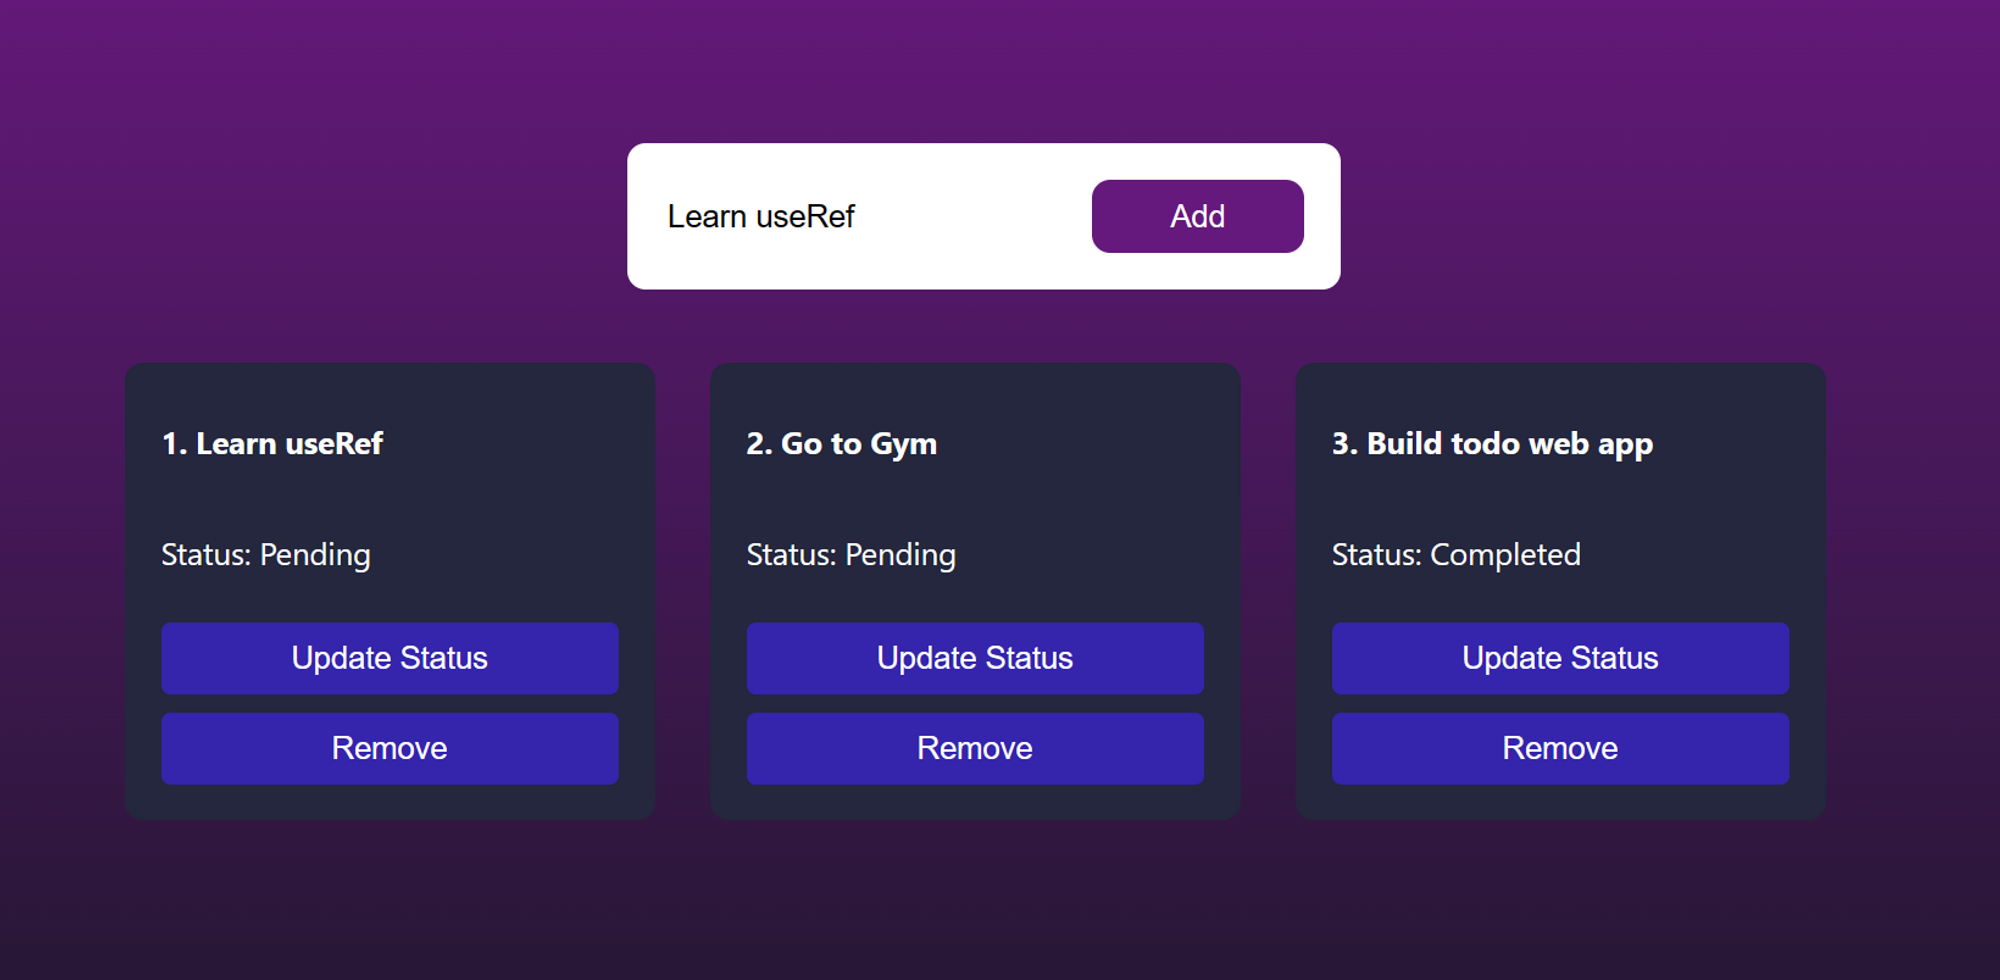

Solution-8&9:

Open the src/App.js file:

In [ ]:
import React, { useState } from 'react';
import './style.css';

const App = () => {
  const [task, setTask] = useState('');
  const [todos, setTodos] = useState([]);

  const handleInputChange = (e) => {
    setTask(e.target.value);
  };

  const handleSubmit = (e) => {
    e.preventDefault();
    if (task.trim() !== '') {
      const newTodo = {
        id: Date.now(),
        task,
        status: 'Pending',
      };
      setTodos([...todos, newTodo]);
      setTask('');
    }
  };

  const handleStatusUpdate = (id) => {
    const updatedTodos = todos.map((todo) => {
      if (todo.id === id) {
        return {
          ...todo,
          status: todo.status === 'Pending' ? 'Completed' : 'Pending',
        };
      }
      return todo;
    });
    setTodos(updatedTodos);
  };

  const handleTodoRemoval = (id) => {
    const updatedTodos = todos.filter((todo) => todo.id !== id);
    setTodos(updatedTodos);
  };

  return (
    <div className="todo-app">
      <h2>React Todo List</h2>
      <form onSubmit={handleSubmit}>
        <input
          type="text"
          placeholder="Enter task here..."
          value={task}
          onChange={handleInputChange}
        />
        <button type="submit">Add Task</button>
      </form>
      <div className="todo-list">
        {todos.map((todo) => (
          <Todo
            key={todo.id}
            todo={todo}
            handleStatusUpdate={handleStatusUpdate}
            handleTodoRemoval={handleTodoRemoval}
          />
        ))}
      </div>
    </div>
  );
};

const Todo = ({ todo, handleStatusUpdate, handleTodoRemoval }) => {
  const { id, task, status } = todo;

  return (
    <div key={id} className="todo">
      <h3>{task}</h3>
      <p>Status: {status === 'Pending' ? 'Pending' : 'Completed'}</p>
      <div className="todo-actions">
        <button
          onClick={() => handleStatusUpdate(id)}
          className={`status-btn ${status === 'Pending' ? 'pending' : 'completed'}`}
        >
          {status === 'Pending' ? 'Mark Completed' : 'Mark Pending'}
        </button>
        <button
          onClick={() => handleTodoRemoval(id)}
          className="remove-btn"
        >
          Remove
        </button>
      </div>
    </div>
  );
};

export default App;

Creating a new file called src/App.css to style the todo-app:



In [ ]:
.todo-app {
  max-width: 800px;
  margin: 0 auto;
  padding: 20px;
  background-color: #f0f0f0;
  border-radius: 5px;
  box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);
}

h2 {
  text-align: center;
  margin-bottom: 20px;
  text-transform: uppercase;
  font-size: 30px;
}

form {
  display: flex;
  margin-bottom: 10px;
}

input[type='text'] {
  flex-grow: 1;
  padding: 8px;
  border: 1px solid #ccc;
  border-radius: 3px;
}

button[type='submit'] {
  padding: 8px 15px;
  background-color: #4caf50;
  color: #fff;
  border: none;
  border-radius: 3px;
  cursor: pointer;
  margin-left: 10px;
}

.todo-list {
  display: grid;
  grid-template-columns: repeat(3, 1fr);
  grid-gap: 10px;
}

.todo {
  background-color: #fff;
  padding: 10px;
  border-radius: 3px;
}

.todo p {
  margin: 0;
}

.todo-actions {
  display: flex;
  justify-content: space-between;
  margin-top: 10px;
}

.status-btn {
  padding: 5px 10px;
  background-color: #2196f3;
  color: #fff;
  border: none;
  border-radius: 5px;
  cursor: pointer;
  margin: 3px;
}

.pending {
  background-color: #ffcc80;
}

.completed {
  background-color: #a5d6a7;
}

.remove-btn {
  padding: 5px 10px;
  background-color: #f44336;
  color: #fff;
  border: none;
  border-radius: 5px;
  cursor: pointer;
  margin: 3px;
}

Now importing App.js it into index.js file and render it as a component:



In [ ]:
import React from 'react';
import ReactDOM from 'react-dom/client';

import App from './App.jsx'

ReactDOM.createRoot( 
  document.querySelector('#root')
).render(<App />)

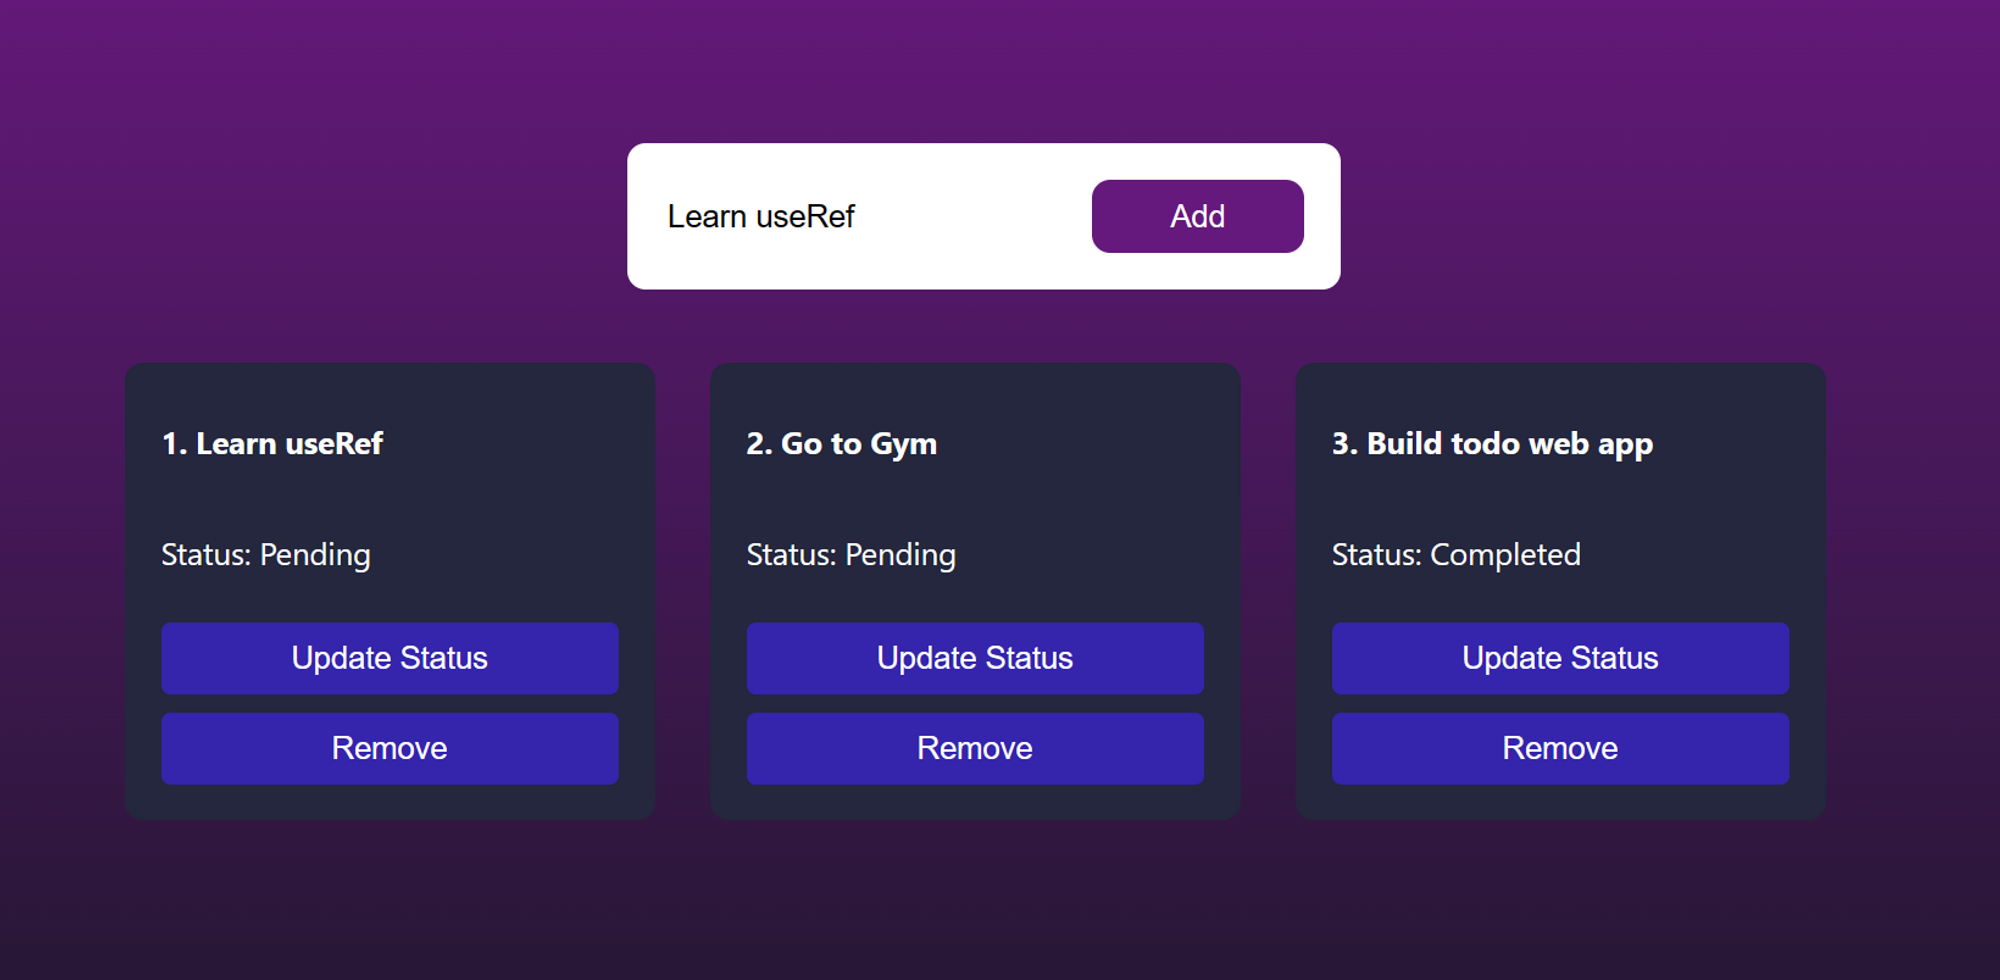

💡 Question-10: Build Calculator Web app using React.

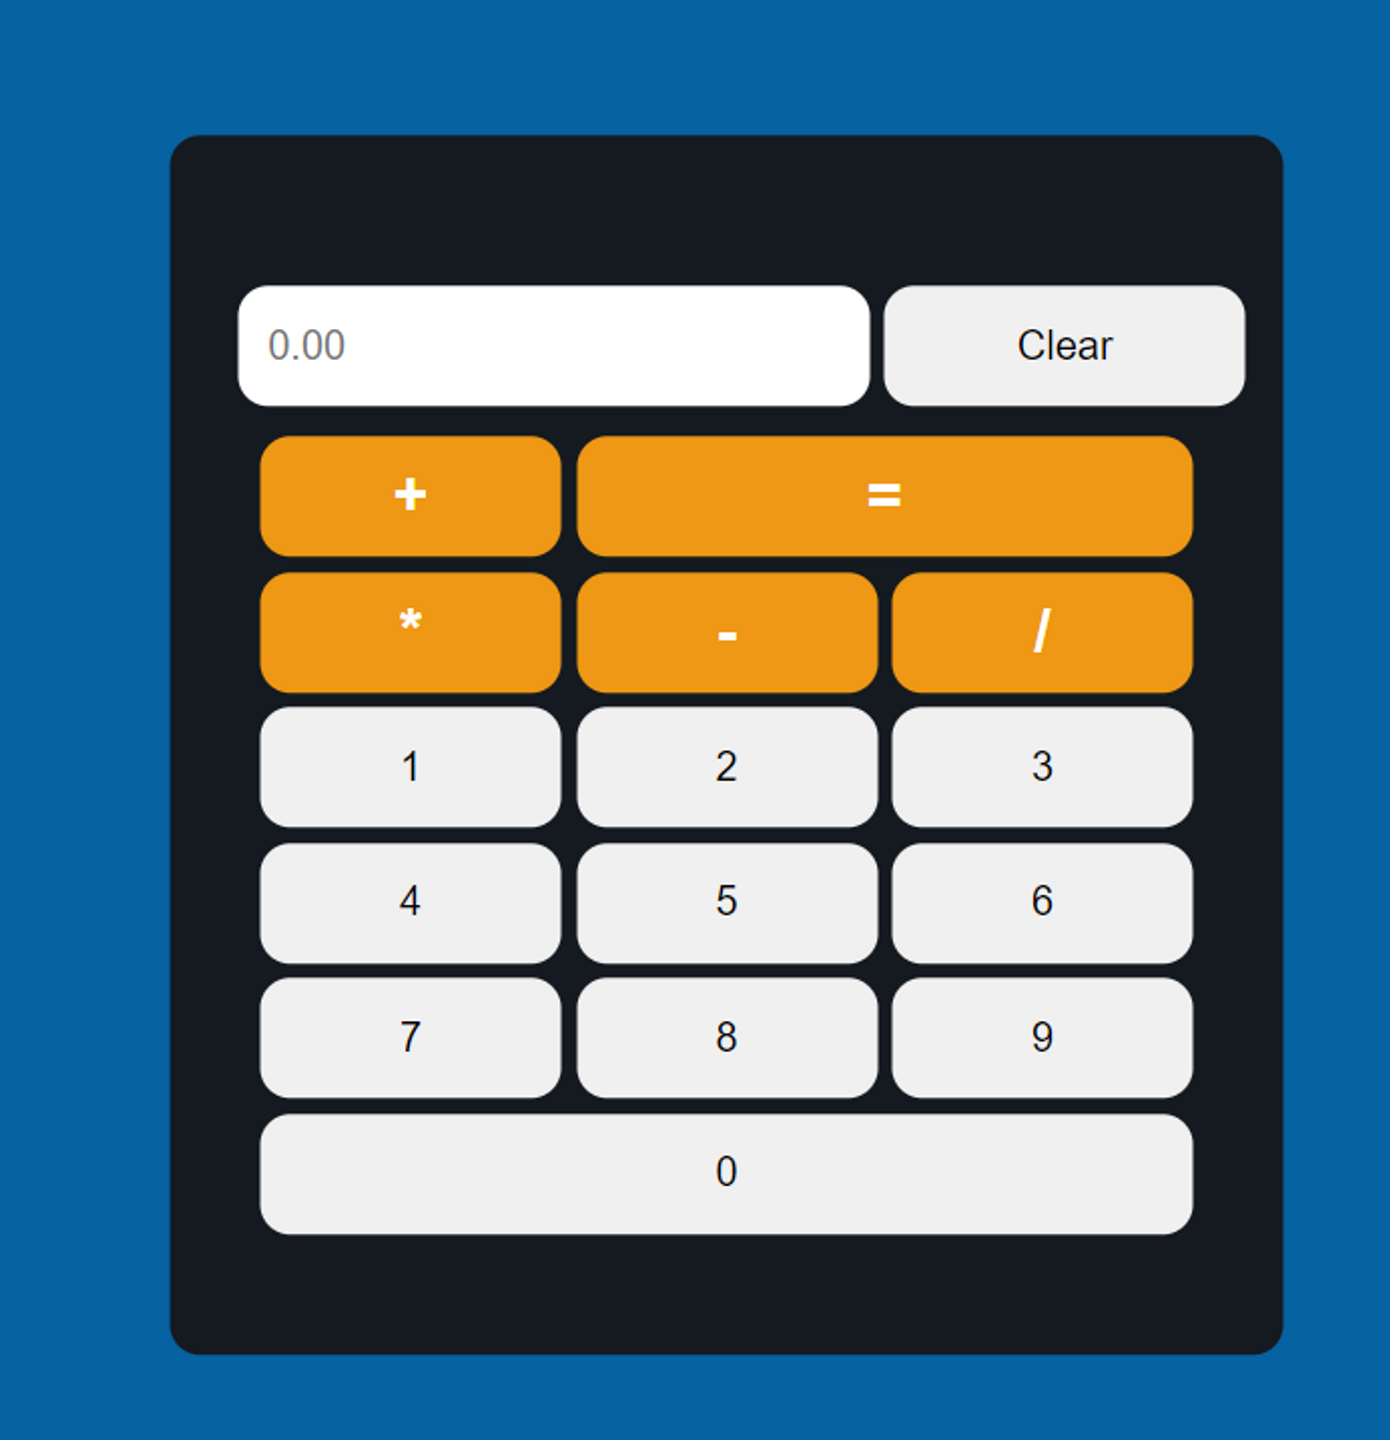

Solution-10:

Open the src/App.js file:

In [ ]:
import React, { useState } from 'react';
import './App.css';

const App = () => {
  const [displayValue, setDisplayValue] = useState('0');
  const [firstOperand, setFirstOperand] = useState(null);
  const [operator, setOperator] = useState(null);
  const [waitingForSecondOperand, setWaitingForSecondOperand] = useState(false);

  const handleNumberClick = (number) => {
    if (waitingForSecondOperand) {
      setDisplayValue(number);
      setWaitingForSecondOperand(false);
    } else {
      setDisplayValue(displayValue === '0' ? number : displayValue + number);
    }
  };

  const handleDecimalClick = () => {
    if (!displayValue.includes('.')) {
      setDisplayValue(displayValue + '.');
    }
  };

  const handleOperatorClick = (selectedOperator) => {
    if (operator && waitingForSecondOperand) {
      setOperator(selectedOperator);
      return;
    }

    const inputValue = parseFloat(displayValue);

    if (firstOperand === null) {
      setFirstOperand(inputValue);
    } else if (operator) {
      const result = performCalculation();
      setDisplayValue(String(result));
      setFirstOperand(result);
    }

    setWaitingForSecondOperand(true);
    setOperator(selectedOperator);
  };

  const performCalculation = () => {
    const firstValue = firstOperand;
    const secondValue = parseFloat(displayValue);

    if (operator === '+') {
      return firstValue + secondValue;
    } else if (operator === '-') {
      return firstValue - secondValue;
    } else if (operator === '×') {
      return firstValue * secondValue;
    } else if (operator === '÷') {
      return firstValue / secondValue;
    }

    return secondValue;
  };

  const handleClearClick = () => {
    setDisplayValue('0');
    setFirstOperand(null);
    setOperator(null);
    setWaitingForSecondOperand(false);
  };

  const handleEqualsClick = () => {
    if (!operator) return;

    const result = performCalculation();
    setDisplayValue(String(result));
    setFirstOperand(result);
    setOperator(null);
    setWaitingForSecondOperand(false);
  };

  return (
    <>
    <h1>React Calculator</h1>
    <div className="calculator">
      <div className="display">{displayValue}</div>
      <div className="buttons">
        <div className="row">
          <button onClick={() => handleNumberClick('7')}>7</button>
          <button onClick={() => handleNumberClick('8')}>8</button>
          <button onClick={() => handleNumberClick('9')}>9</button>
          <button className="operator" onClick={() => handleOperatorClick('÷')}>
            ÷
          </button>
        </div>
        <div className="row">
          <button onClick={() => handleNumberClick('4')}>4</button>
          <button onClick={() => handleNumberClick('5')}>5</button>
          <button onClick={() => handleNumberClick('6')}>6</button>
          <button className="operator" onClick={() => handleOperatorClick('×')}>
            ×
          </button>
        </div>
        <div className="row">
          <button onClick={() => handleNumberClick('1')}>1</button>
          <button onClick={() => handleNumberClick('2')}>2</button>
          <button onClick={() => handleNumberClick('3')}>3</button>
          <button className="operator" onClick={() => handleOperatorClick('-')}>
            -
          </button>
        </div>
        <div className="row">
          <button onClick={() => handleNumberClick('0')}>0</button>
          <button onClick={handleDecimalClick}>.</button>
          <button className="equals" onClick={handleEqualsClick}>
            =
          </button>
          <button className="operator" onClick={() => handleOperatorClick('+')}>
            +
          </button>
        </div>
        <div className="row">
          <button onClick={handleClearClick} className="clear-button">
            C
          </button>
        </div>
      </div>
    </div>
    </>
  );
};

export default App;

Creating a new file called src/App.css to style the calculator:



In [ ]:
h1{
 text-align: center;
 text-transform: uppercase;
 margin: 40px;
}

.calculator {
  max-width: 300px;
  margin: 0 auto;
  background-color: #f0f0f0;
  padding: 10px;
  border-radius: 5px;
  box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);
}

.display {
  background-color: #fff;
  text-align: right;
  padding: 10px;
  font-size: 24px;
  border-radius: 3px;
  margin-bottom: 10px;
}

.buttons {
  display: grid;
  grid-template-columns: repeat(1, 1fr);
  grid-gap: 10px;
}

.row {
  display: flex;
  justify-content: space-between;
}

button {
  background-color: #fff;
  border: 1px solid #ccc;
  border-radius: 3px;
  padding: 15px;
  font-size: 18px;
  width: 100%;
  cursor: pointer;
  margin: 4px;
}

button.operator {
  background-color: #ff8c00;
  color: #fff;
}

button.equals {
  background-color: #ff4136;
  color: #fff;
}

button.clear-button {
  background-color: #ff4136;
  color: #fff;
  width: 100%;
}

Now importing App.js it into index.js file and render it as a component:



import React from 'react';
import ReactDOM from 'react-dom/client';

import App from './App.jsx'

ReactDOM.createRoot( 
  document.querySelector('#root')
).render(<App />)